# ***CAPSTONE PROJECT: BOOK RECOMMENDER SYSTEM***

>> ### ***SUBMITTED BY: MALAIKA AHMED***

***
## ***Project focuses on popularity based and collaborative filtering based techiques to recommend 5 similar books***
### **Tools**: Pycharm and Colab
### **Languages:** Python,Html and CSS.




***

***

## ***What is a recommender system?***

As the name suggests,a recommender system is a system that recommends something.In simple words,recommender system is a piece of code that carries the capacity to understand the user's preference and recommends product/content based on the user's preferences,interest or past choices.Main target of a recommender system is to increase the profit.

## ***Why is the recommender system important?***
Consider a scenario where you are at a shopping mall.You are facing difficulty in choosing the right outfit for your project presentation at university. The assistant there at the shopping mall will recommend clothes based on your interest or past choices.(if you are his regular customer).The target of the assistant is to keep you in the same shop and make you buy something,leading to mutual benefit for both parties,ease for you in making the right choice and the shop to earn profit.


## ***Types of Recommender System:***
There are four primary types of recommender system
> ### ***1. Popularity Based Recommender System***
Popularity based Recommender system works by showing the most popular products/content of platform on the surface.Like
- Trending videos on Youtube.
- Best 50 movies according to IMDB rating

> ### ***2. Content Based Recommender System***

Content based recommender system makes recommendations based on similarity of product or content . It works by analyzing the user's search history,purchase history or past choices. For example
- If a user likes the movie harry potter,suggests he might also be interested in science fiction and fantasy movies.Therefore content based recommender system will suggest him related movies.
- If a user likes the content of books by scholar Nouman Ali khan, he might also be interested in reading books by other scholars like Yasmeen moghahed,Omer suleman,Muhammad HIjab.




> ### ***3. Collaborative Filtering Based Recommender System***
Collaborative Filtering based recommender system recommends product/content according to interest,pattern or ratings given by  similar users. It works by analyzing the user’s search/purchase history plus history of similar users too and recommends content/products that other users have liked or interacted with.For example:
- If one user likes watching thriller,science fiction,action movies and the second user likes thriller,science fiction and historic then it is most likely that first person will like historic and second will like action movies.

> ### ***4.Hybrid Recommender System***
Hybrid recommender system’s  approach to  recommendation is a hybrid of approaches for all three recommender systems (Popularity Based,Content Based and Collaborative Filtering based). Netflix is an excellent example for this case.It recommends movies by taking into account both users and similar user’s search/watch history plus those movies that show similar traits with those highly rated by user and similar user’s


***

***

## **Importing Libraries**

In [202]:
import numpy as np
import pandas as pd

## ***Loading Dataset***

In [203]:
books=pd.read_csv("/content/Books.csv")
users=pd.read_csv("/content/Users.csv")
ratings=pd.read_csv("/content/Ratings.csv")

<ipython-input-203-8aad1fc21609>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("/content/Books.csv")


## ***Exploring Dataset for Pre-Processing***

In [204]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [205]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [206]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [207]:
# Checking shape of each of the 3 dataframes(Books,ratings,and users)

In [208]:
books.shape

(271360, 8)

In [209]:
ratings.shape


(1149780, 3)

In [210]:
users.shape

(278858, 3)

In [211]:
# Displaying random columns of all three dataframe

In [212]:
books.sample(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
133212,0929162110,Kids Who Do - Kids Who Don't: A Parent's Guide...,Lorraine Henricks,1989,Pia Pr,http://images.amazon.com/images/P/0929162110.0...,http://images.amazon.com/images/P/0929162110.0...,http://images.amazon.com/images/P/0929162110.0...
242023,0374437157,Jack's New Power : Stories from a Caribbean Year,Jack Gantos,1997,"Farrar, Straus and Giroux (BYR)",http://images.amazon.com/images/P/0374437157.0...,http://images.amazon.com/images/P/0374437157.0...,http://images.amazon.com/images/P/0374437157.0...
177252,3822863254,J.M.W. Turner 1775-1851: World of Light and Co...,Michael Bockemuhl,2000,Taschen,http://images.amazon.com/images/P/3822863254.0...,http://images.amazon.com/images/P/3822863254.0...,http://images.amazon.com/images/P/3822863254.0...


In [213]:
users.sample(3)

,User-ID,Location,Age
233940,233941,"manchester, michigan, usa",15.0
211520,211521,"santa maria da feira, porto, portugal",223.0
44614,44615,"paraná, entre ríos, argentina",28.0


In [214]:
ratings.sample(3)

,User-ID,ISBN,Book-Rating
781597,189334,0684854961,0
85440,18082,0373832060,0
888042,213915,0006513506,0


## ***Pre-Processing***

In [215]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [216]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [217]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [218]:
# Checking for duplicates

In [219]:
books.duplicated().sum()

0

In [220]:
users.duplicated().sum()

0

In [221]:
ratings.duplicated().sum()

0

***

# ***Buiding Popularity Based Recommender System***
 Considering the books on which
- minimum of 250 people have given votings
- Top 50 books with highest average ratings



In [222]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [223]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#### ***Concatenating books and ratings df on isbn column***

In [224]:
ratings.merge(books,on='ISBN' )

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [225]:
pd.merge(ratings,books,on='ISBN').shape

(1031136, 10)

In [226]:
# storing concatenated df of ratings and books in a variable "ratings_with_name"
ratings_with_name=pd.merge(ratings,books,on='ISBN')

In [227]:
ratings_with_name.sample(2)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
264015,55492,0671023187,0,Term Limits,Vince Flynn,1999,Pocket Star,http://images.amazon.com/images/P/0671023187.0...,http://images.amazon.com/images/P/0671023187.0...,http://images.amazon.com/images/P/0671023187.0...
889837,114414,0836206290,0,The Formula Book,Norman. Stark,1975,Andrews McMeel Pub,http://images.amazon.com/images/P/0836206290.0...,http://images.amazon.com/images/P/0836206290.0...,http://images.amazon.com/images/P/0836206290.0...


#### ***Performing group by function on ratings_with_name and book title so as to extract(50) books with min of 250 prople have given ratings and they have received highest average ratings***

In [228]:
ratings_with_name.groupby('Book-Title').count()

,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Book-Title,,,,,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,4,4,4,4,4,4,4,4
Always Have Popsicles,1,1,1,1,1,1,1,1,1
Apple Magic (The Collector's series),1,1,1,1,1,1,1,1,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,1,1,1,1,1,1,1,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Ã?Â?lpiraten.,2,2,2,2,2,2,2,2,2
Ã?Â?rger mit Produkt X. Roman.,4,4,4,4,4,4,4,4,4
Ã?Â?sterlich leben.,1,1,1,1,1,1,1,1,1


In [229]:
ratings_with_name.groupby('Book-Title').count()['Book-Rating']

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...
Ã?Â?lpiraten.,2
Ã?Â?rger mit Produkt X. Roman.,4
Ã?Â?sterlich leben.,1


### ***Adding index column***

In [230]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [231]:
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


#### ***Renaming Book-Rating column name to "num_ratings"***

In [232]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)

In [233]:
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


### ***This line ensures that the values in the 'Book-Rating' column are numeric, replacing any non-convertible values with NaN.***

In [234]:
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

In [235]:
# Creating a new DataFrame (avg_rating_df) that holds the average rating for each book title from the original ratings_with_name DataFrame.
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Renaming column "Book-Rating" to "avg_rating"
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


### ***Merging average rating column and number of ratings column on column "book title"***

In [236]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


### ***Filtering popular_df to include only books with at least 250 ratings, sorting them by average rating in descending order, and then keeping only the top 50 books***

In [237]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)


In [238]:
# Merging popular_df with the books DataFrame,
# removing duplicate book titles, and
# retaining only Book-Tile, Book-Author,Image-URL-M,num_rating and avg_rating updating popular_df with this new information.

popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [239]:
popular_df.shape

(50, 5)

In [240]:
# Displaying the first image of column "Image-URL-M"
popular_df['Image-URL-M'][0]


'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

***

## ***Building Collaborative Filtering Based Recommender System***

In this,considering:

- The users who have given ratings on minimum of 200 books.
- And those books on which atleast 50 ratings have been done.




In [241]:
# Grouping ratings with name column and "User-ID"

ratings_with_name.groupby('User-ID').count()

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
User-ID,,,,,,,,,
2,1,1,1,1,1,1,1,1,1
8,17,17,17,17,17,17,17,17,17
9,3,3,3,3,3,3,3,3,3
10,1,1,1,1,1,1,1,1,1
12,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
278846,1,1,1,1,1,1,1,1,1
278849,4,4,4,4,4,4,4,4,4
278851,23,23,23,23,23,23,23,23,23


In [242]:
#  Filtering the users who have minimum of 200 books
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [243]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]


In [244]:
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [245]:
# Filtering books who have been rated min of 50 times

y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50


In [246]:
y

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",False
Always Have Popsicles,False
Apple Magic (The Collector's series),False
Beyond IBM: Leadership Marketing and Finance for the 1990s,False
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),False
...,...
Ã?Â?ber das Fernsehen.,False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.,False
Ã?Â?lpiraten.,False


In [247]:
# Adding index
famous_books = y[y].index


In [248]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [249]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [250]:
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [251]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [252]:
pt.fillna(0,inplace=True)


In [253]:
pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ***Insights***
Above dataframe shows that their's:
- 706 users in our dataset who have given ratings on atleast 200 books
- 810 books who have been rated atleast 50 times.

## ***Finding Similarity Score***
- Considering that each book is a vector in 810 Dimensional coordinate system.
- We have to find Euclidean distance between books.
- On the basis of this distance,we will decide which books are closely related.

In [254]:
from sklearn.metrics.pairwise import cosine_similarity

In [255]:
similarity_scores = cosine_similarity(pt)

In [256]:
similarity_scores.shape

(706, 706)

In [257]:
# Displaying similarity score of first book wih all other books (Euclidean distance)
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [258]:
def recommend(book_name):
      return suggestions

In [259]:
## From book name,fetching the index position.Book "1984" is at index position 0
index1 = np.where(pt.index=='1984')[0][0]

In [260]:
index1

0

In [261]:
# Using the same format, fetching index from similarity_scores
distances=similarity_scores[index]

In [262]:
distances

array([0.07347567, 0.16773875, 0.04938579, 0.        , 0.11284126,
       0.11224972, 0.1536172 , 0.07070243, 0.13194105, 0.0879174 ,
       0.09394598, 0.        , 0.0722577 , 0.08751563, 0.19013896,
       0.08838835, 0.13847624, 0.0493197 , 0.10184887, 0.06381997,
       0.12381007, 0.        , 0.12535646, 0.08885599, 0.13360872,
       0.        , 0.05969674, 0.06236096, 0.16039401, 0.06786258,
       0.03106883, 0.05959444, 0.        , 0.30199543, 0.        ,
       0.14389473, 0.04492721, 0.22358045, 0.10559799, 0.19520018,
       0.        , 0.0803096 , 0.03598302, 0.04895763, 0.05785163,
       0.17427718, 0.        , 0.07634573, 0.09451121, 0.11624778,
       0.09408918, 0.10399847, 0.        , 0.10328147, 0.0777027 ,
       0.        , 0.1270828 , 0.02257064, 0.13786105, 0.05758289,
       0.07193131, 0.        , 0.05018676, 0.32252503, 0.        ,
       0.0840875 , 0.07884165, 0.        , 0.10081854, 0.02776016,
       0.        , 0.        , 0.13552619, 0.02218391, 0.08678

In [263]:
# Similarity score of book "1984" with all other books
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [264]:
# Now we have to find books with most similarity scores.
# Displaying index position alongiwth similarity scores

list(enumerate(similarity_scores[index]))

[(0, 0.07347566833900478),
 (1, 0.167738747009666),
 (2, 0.049385791533561194),
 (3, 0.0),
 (4, 0.11284126193916974),
 (5, 0.11224972160321824),
 (6, 0.15361720202716334),
 (7, 0.07070243341762764),
 (8, 0.1319410475877449),
 (9, 0.08791739645277159),
 (10, 0.09394597981669818),
 (11, 0.0),
 (12, 0.07225769692096456),
 (13, 0.08751562918651386),
 (14, 0.1901389647343182),
 (15, 0.08838834764831843),
 (16, 0.13847623672431844),
 (17, 0.049319696191607185),
 (18, 0.10184887337581867),
 (19, 0.06381996508895696),
 (20, 0.12381006971050557),
 (21, 0.0),
 (22, 0.12535646060197012),
 (23, 0.08885598535680138),
 (24, 0.13360872291251571),
 (25, 0.0),
 (26, 0.05969674327970392),
 (27, 0.06236095644623235),
 (28, 0.1603940145729817),
 (29, 0.06786258395299352),
 (30, 0.03106883103588355),
 (31, 0.05959443516119297),
 (32, 0.0),
 (33, 0.30199542705413734),
 (34, 0.0),
 (35, 0.14389472555751187),
 (36, 0.04492721269564549),
 (37, 0.22358044597056814),
 (38, 0.1055979918469981),
 (39, 0.1952001809

In [265]:
# Sorting on the basis of simlarity score
# Finding top 5 books with most similarity scores with book '1984'

similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

In [266]:
similar_items

[(194, 0.6188332046777835),
 (424, 0.5423917439488084),
 (288, 0.4536936187776783),
 (175, 0.43416881684252095),
 (196, 0.43104197190280946)]

In [267]:
# Running loop to get index value only of those similar books with book '1984'

for i in similar_items:
  print(i[0])



194
424
288
175
196


In [268]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    for i in similar_items:
           print(pt.index[i[0]])


In [269]:
recommend("1984")

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


### ***Checking the function for other books***

In [270]:
recommend("Message in a Bottle")

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [271]:
recommend("Nights in Rodanthe")

The Mulberry Tree
Dark Angel
A Walk to Remember
GARDEN OF SHADOWS (Dollanger Saga (Paperback))
The Wedding


In [272]:
recommend("Animal Farm")

1984
Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson
Midnight
Second Nature
Call of the Wild


In [273]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [274]:
# Writting the above code of lines here.
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    return data

In [275]:
popular_df["Image-URL-M"][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [276]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


***
## ***Exporting popular_df to pycharm***
- For buiding GUI of our system,using pycharm

In [277]:
# importing pickle for exporting data popular_df
import pickle

In [304]:
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    item = []
    for i in similar_items:
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.append(temp_df.drop_duplicates('Book-Title')['Book-Author'])
    return item


In [305]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [306]:
recommend('Animal Farm')

[2104    George Orwell
 Name: Book-Author, dtype: object,
 7603    Louise Rennison
 Name: Book-Author, dtype: object,
 3619    Dean R. Koontz
 Name: Book-Author, dtype: object,
 9722    Alice Hoffman
 Name: Book-Author, dtype: object,
 3078    Jack London
 Name: Book-Author, dtype: object]

***
***

# ***Some snaps from GUI***









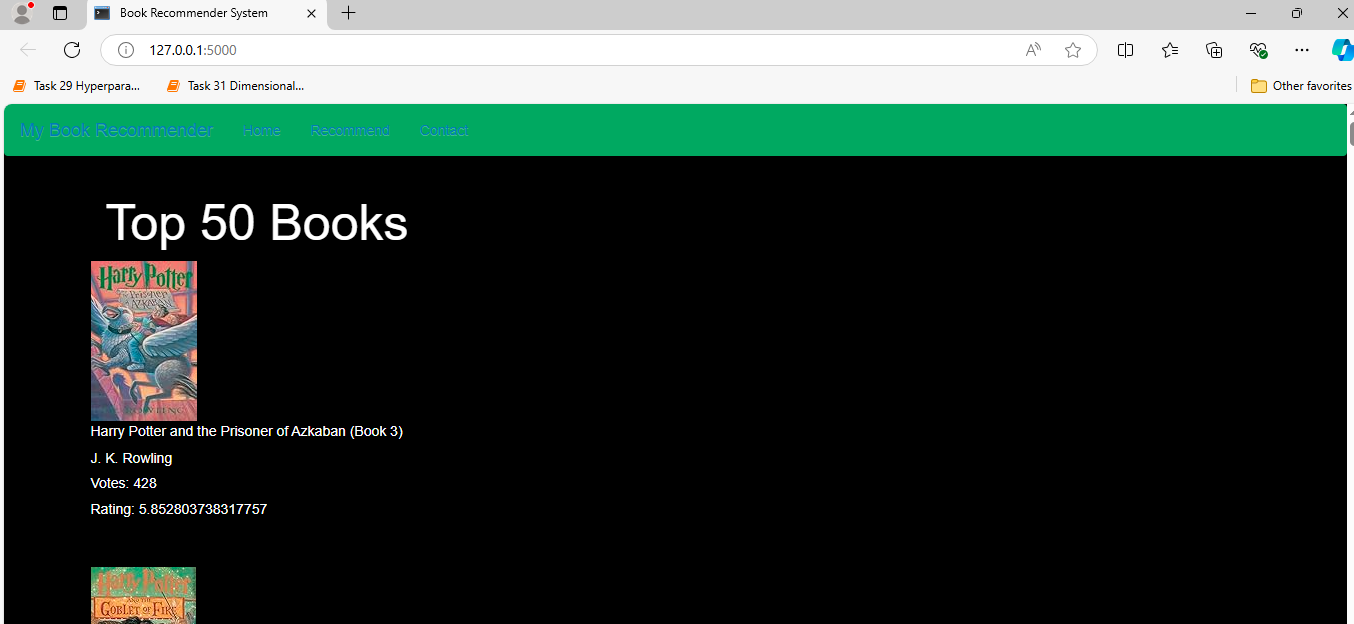

***


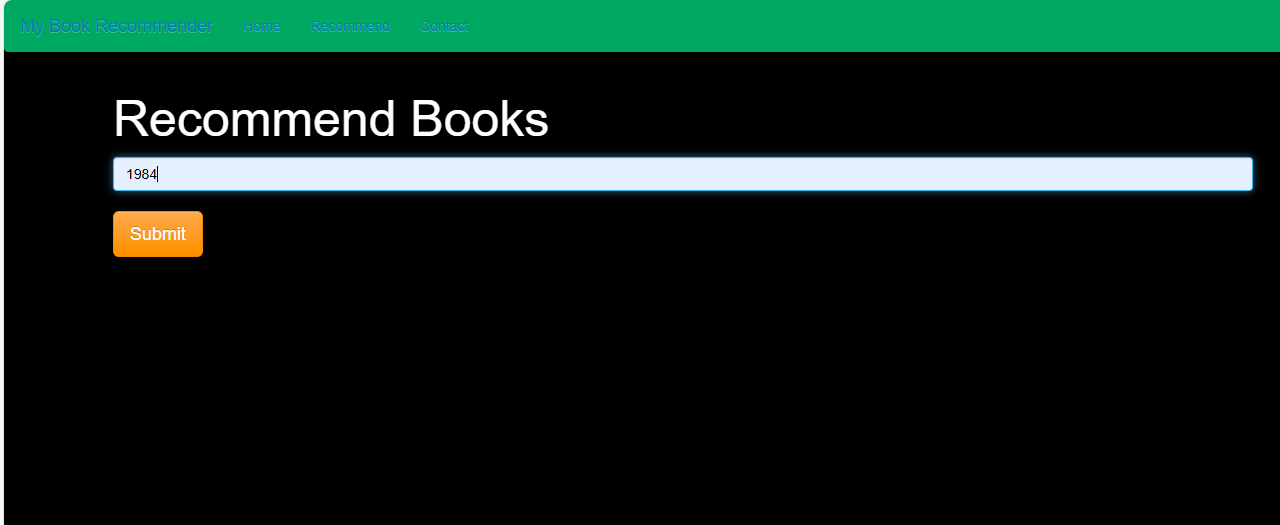

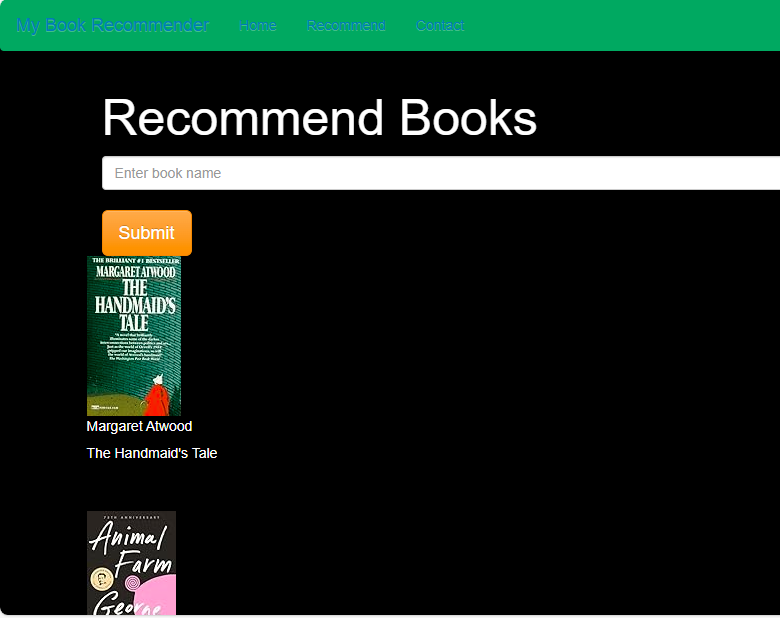

***
